西瓜书习题3.5:编程实现线性判别分析，并给出西瓜数据集3.0α上的结果。

In [10]:
import numpy as np
from numpy import linalg
data = np.array([[0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719],
       [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103]])
label=np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])

In [11]:
data = data.T

In [22]:
#集合
X0 = data[:8]
X1 = data[8:]
X = np.array([X0,X1])
#均值向量
u0 = np.mean(X0,axis=0)
u1 = np.mean(X1,axis=0)
u = np.array([u0, u1])
X

array([array([[0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.608, 0.318],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211]]),
       array([[0.666, 0.091],
       [0.243, 0.267],
       [0.245, 0.057],
       [0.343, 0.099],
       [0.639, 0.161],
       [0.657, 0.198],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.719, 0.103]])], dtype=object)

In [31]:
X[1].shape

(9, 2)

In [33]:
'''
#类内散度矩阵S_w

@para   X：数据集
@para   u：均值向量
@return S_w：类内散度矩阵S_w
'''
def S_w(X, u):
    M0 = 0.0
    M1 = 0.0
    for i in range(X[0].shape[0]):
        M0 += np.dot(X[0][i]-u[0], (X[0][i]-u[0]).T)
    for i in range(X[1].shape[0]):
        M0 += np.dot(X[1][i]-u[1], (X[1][i]-u[1]).T)
    return M0 + M1
S_w = S_w(X,u)
S_w

0.5844474444444444

In [34]:
'''
#类间散度矩阵

@para   u：均值向量
@return S_b：类内散度矩阵S_b
'''
def S_b(u):
    return np.dot(u[0]-u[1], (u[0]-u[1]).T)
S_b(u)

0.02153496450617283

In [36]:
#公式3.39计算w
w = (u[0]-u[1])/S_w
w

array([0.13284152, 0.21306925])

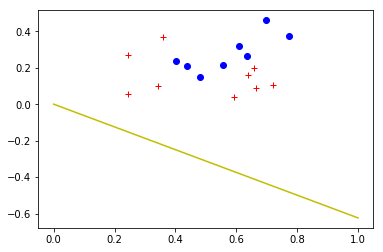

In [38]:
#画图显示最终结果
import matplotlib.pyplot as plt
for i in range(data.shape[0]):
    if(label[i]==0):
        plt.plot(data[i][0],data[i][1],'r+')
    else:
        plt.plot(data[i][0],data[i][1],'bo')
x = np.linspace(0, 1, 50)
y = -w[0]/w[1]*x 
plt.plot(x,y,'y-')
plt.show()